<a href="https://colab.research.google.com/github/MaRafaBe/08MBID---Visualizacion-de-Datos/blob/main/AG3_VIU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar los modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
url="http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv?"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
# Renombrar columnas
titanic.rename(columns={'class':'clase'},inplace=True)
titanic.rename(columns={'fare':'tarifa'},inplace=True)

In [4]:
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
def is_old_func(row):
  return row['age']>60

titanic['is_old']= titanic.apply(is_old_func,axis='columns')

titanic.eval('is_baby = age < 15',inplace =True)

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [8]:
#Define una variable numérica: class_num
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')


In [9]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [10]:
#Consulta con condiciones
titanic[
  (titanic.sex == 'female')
  & (titanic['clase'].isin(['First', 'Third']))
  & (titanic.age > 45 )
  & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

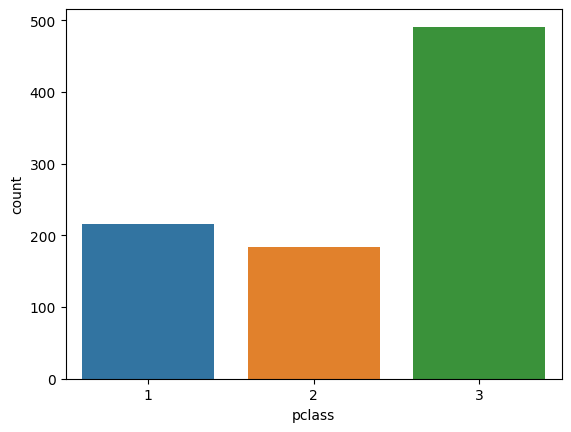

In [11]:
# Distribucion de la variable clase

sns.countplot(x="pclass", data=titanic)

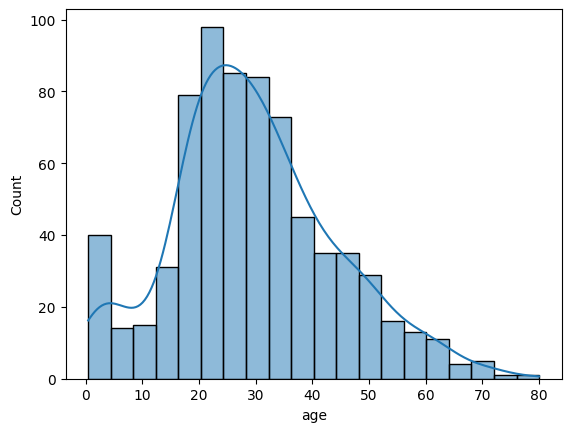

In [12]:
# Distribucion basado en histogramas por la edad

sns.histplot(titanic.age.dropna(), kde=True)

plt.show()

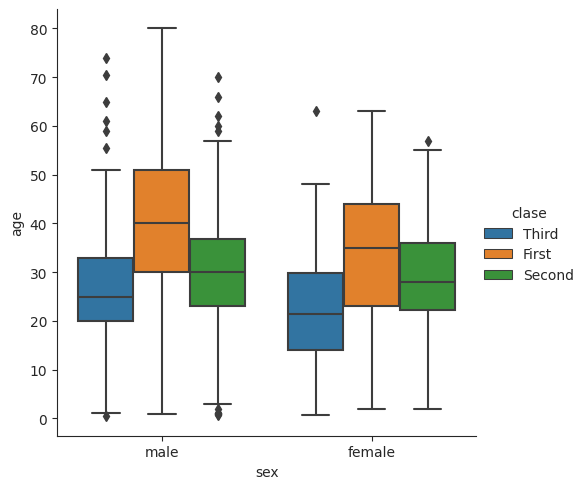

In [13]:
# Boxplot edad vs sexo
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box")

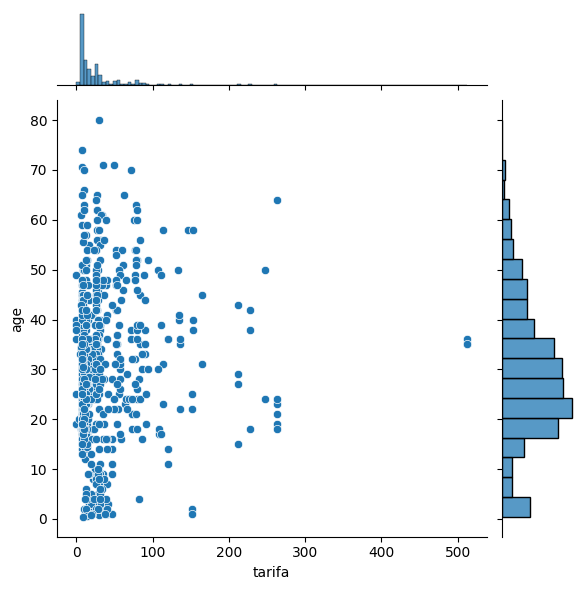

In [14]:
# Distribucion cruzada
sns.jointplot(x="tarifa", y="age", data=titanic)

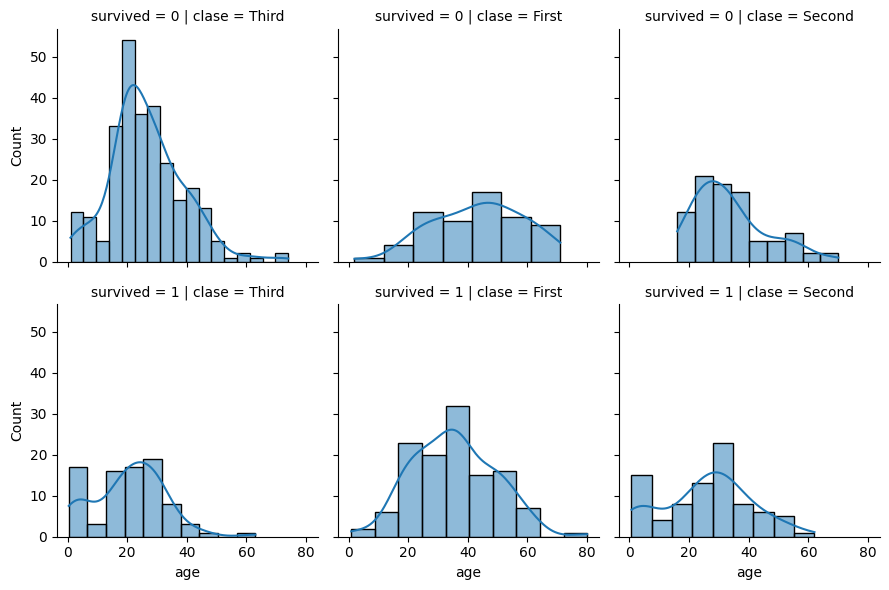

In [18]:
#Matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.histplot, "age", kde=True)
plt.show()

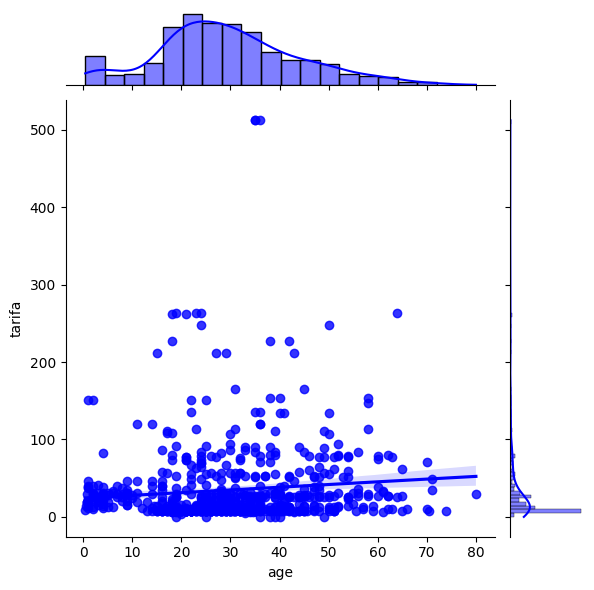

In [19]:
# Diamagra de dispersión
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

<ipython-input-20-61d1b877940f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

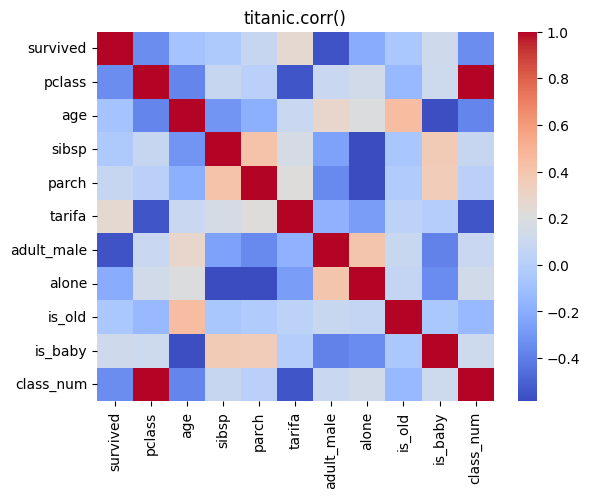

In [20]:
# Diagrama de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

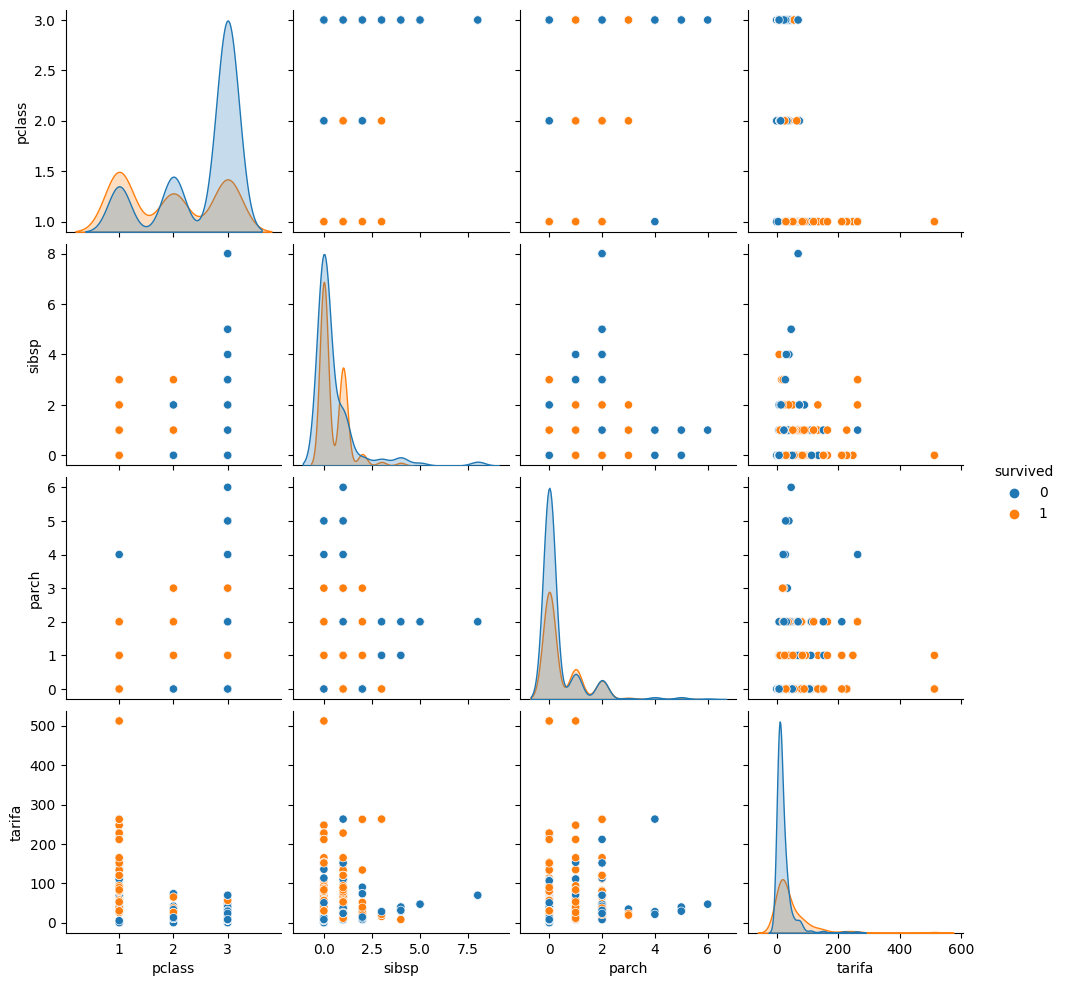

In [22]:
#Define un subconjuto de datos con las variablesnuméricas
titanic_num =titanic[['survived','pclass','sibsp','parch','tarifa']]
#Hace una matriz de diagramas de dispersión de parejas devariables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

In [28]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'tarifa',
       'embarked', 'clase', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'is_old', 'is_baby', 'class_num'],
      dtype='object')

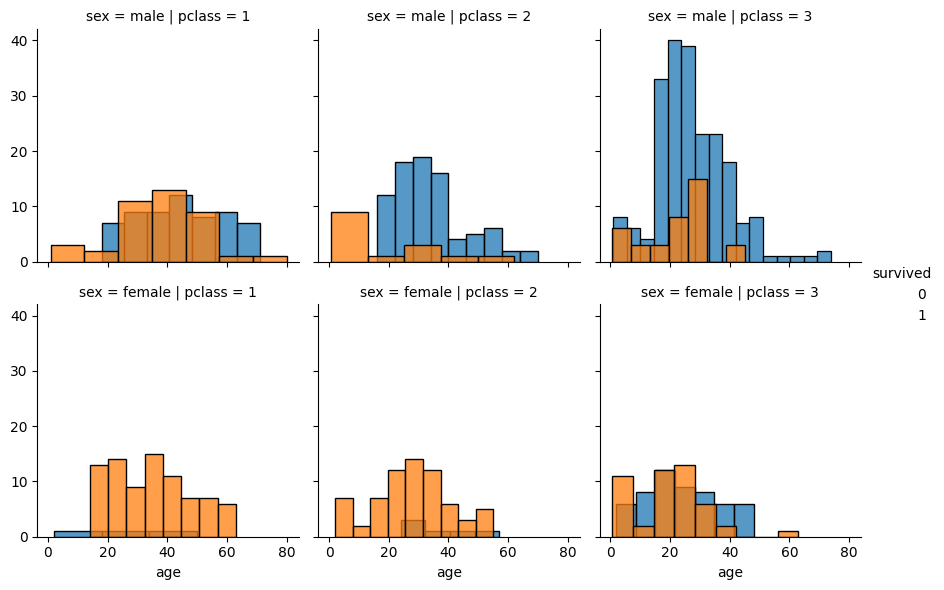

In [93]:

g = sns.FacetGrid(data=titanic, legend_out=True, row='sex',col='pclass', hue='survived')
g.map(sns.histplot, "age",cbar=True)
g.add_legend(legend_data=titanic.survived,title='survived',adjust_subtitles=True)
g.set_ylabels(label=None, clear_inner=True)
plt.show()



